In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(URL, sep=";")

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(df.shape)
print(df.dtypes)
df.isna().sum()


(1599, 12)
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
ph                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


In [5]:
desc = df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]).T
desc[["mean","std","min","10%","25%","50%","75%","90%","max"]]

,mean,std,min,10%,25%,50%,75%,90%,max
fixed_acidity,8.319637,1.741096,4.60000,6.500000,7.1000,7.90000,9.200000,10.70000,15.90000
volatile_acidity,0.527821,0.179060,0.12000,0.310000,0.3900,0.52000,0.640000,0.74500,1.58000
citric_acid,0.270976,0.194801,0.00000,0.010000,0.0900,0.26000,0.420000,0.52200,1.00000
residual_sugar,2.538806,1.409928,0.90000,1.700000,1.9000,2.20000,2.600000,3.60000,15.50000
chlorides,0.087467,0.047065,0.01200,0.060000,0.0700,0.07900,0.090000,0.10900,0.61100
free_sulfur_dioxide,15.874922,10.460157,1.00000,5.000000,7.0000,14.00000,21.000000,31.00000,72.00000
total_sulfur_dioxide,46.467792,32.895324,6.00000,14.000000,22.0000,38.00000,62.000000,93.20000,289.00000
density,0.996747,0.001887,0.99007,0.994556,0.9956,0.99675,0.997835,0.99914,1.00369
ph,3.311113,0.154386,2.74000,3.120000,3.2100,3.31000,3.400000,3.51000,4.01000
sulphates,0.658149,0.169507,0.33000,0.500000,0.5500,0.62000,0.730000,0.85000,2.00000


In [6]:
x = df["alcohol"].to_numpy()
media = x.mean()
mediana = np.median(x)
moda = pd.Series(x).value_counts().idxmax()
var_m = x.var(ddof=1)
std_m = x.std(ddof=1)
q1, q2, q3 = np.quantile(x, [0.25, 0.5, 0.75])
iqr = q3 - q1

print(f"mean={media:.4f}  median={mediana:.4f}  mode={moda}")
print(f"var={var_m:.4f}   std={std_m:.4f}   Q1={q1:.4f}  Q2={q2:.4f}  Q3={q3:.4f}  IQR={iqr:.4f}")


mean=10.4230  median=10.2000  mode=9.5
var=1.1356   std=1.0657   Q1=9.5000  Q2=10.2000  Q3=11.1000  IQR=1.6000


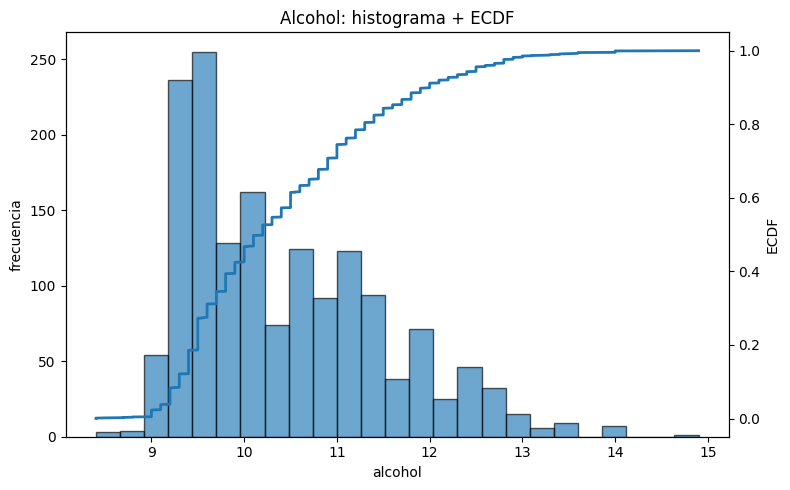

In [11]:
# === 5) Hist + ECDF (sin seaborn) ===
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.hist(x, bins=25, edgecolor="black", alpha=0.65)
ax1.set_xlabel("alcohol"); ax1.set_ylabel("frecuencia")

ax2 = ax1.twinx()
xs = np.sort(x)
ys = np.arange(1, len(xs)+1)/len(xs)
ax2.plot(xs, ys, linewidth=2)
ax2.set_ylabel("ECDF")

plt.title("Alcohol: histograma + ECDF")
plt.tight_layout()
plt.show()


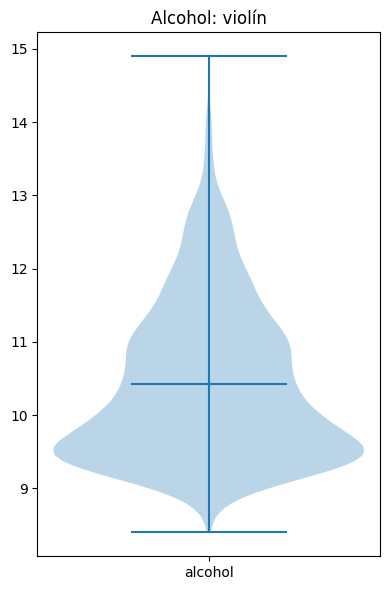

In [13]:
plt.figure(figsize=(4,6))
plt.violinplot([x], showmeans=True, showextrema=True, vert=True)
plt.xticks([1], ["alcohol"])
plt.title("Alcohol: violín")
plt.tight_layout(); plt.show()

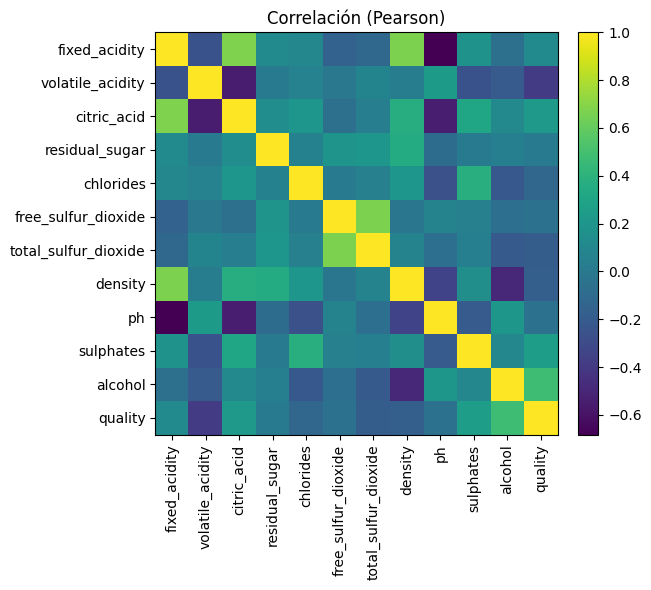

In [14]:
cols = df.columns
C = df.corr(numeric_only=True).values

plt.figure(figsize=(7,6))
im = plt.imshow(C, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
plt.title("Correlación (Pearson)")
plt.tight_layout(); plt.show()


In [15]:
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
mask_in = (df["alcohol"] >= low) & (df["alcohol"] <= high)
df_clean = df[mask_in].copy()

df.shape, df_clean.shape, (~mask_in).sum()

((1599, 12), (1586, 12), np.int64(13))

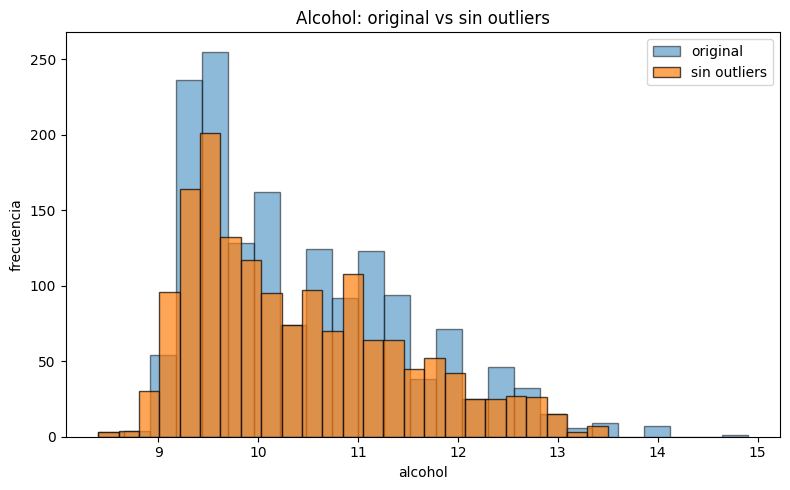

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df["alcohol"], bins=25, alpha=0.5, edgecolor="black", label="original")
plt.hist(df_clean["alcohol"], bins=25, alpha=0.7, edgecolor="black", label="sin outliers")
plt.title("Alcohol: original vs sin outliers")
plt.xlabel("alcohol"); plt.ylabel("frecuencia"); plt.legend()
plt.tight_layout(); plt.show()

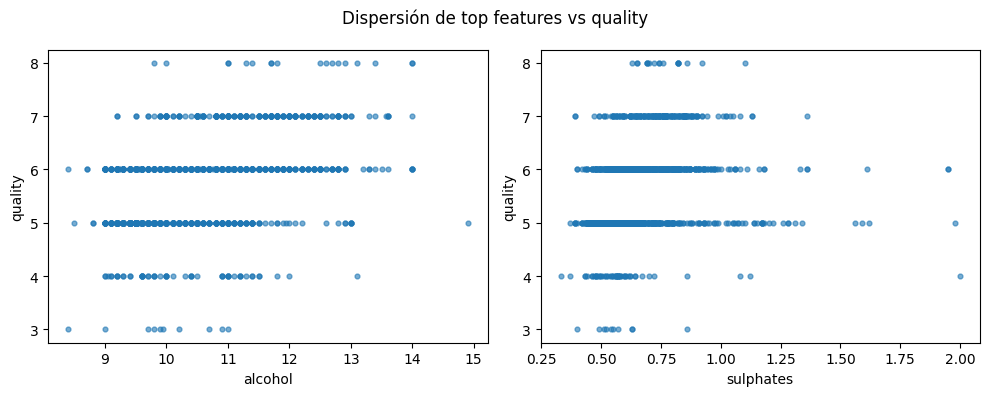

In [17]:
corr_q = df.corr(numeric_only=True)["quality"].drop("quality").sort_values(ascending=False)
top2 = corr_q.index[:2].tolist()
corr_q.head(10)

# dispersión para top 2
fig, axes = plt.subplots(1,2, figsize=(10,4))
for ax, col in zip(axes, top2):
    ax.scatter(df[col], df["quality"], s=12, alpha=0.6)
    ax.set_xlabel(col); ax.set_ylabel("quality")
fig.suptitle("Dispersión de top features vs quality")
plt.tight_layout(); plt.show()

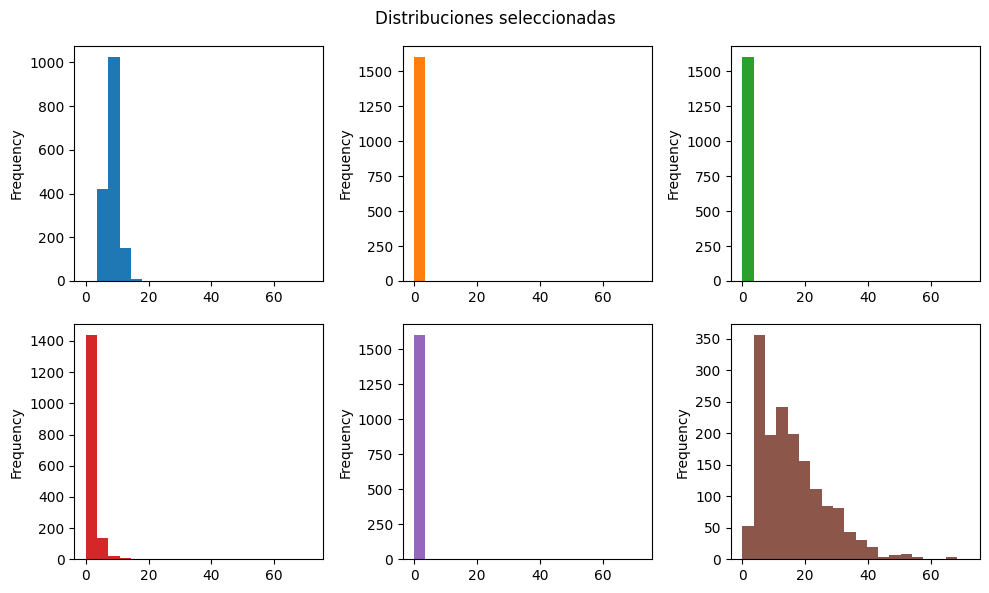

In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sel = [c for c in num_cols if c != "quality"][:6]  # primeros 6
df[sel].plot(kind="hist", bins=20, subplots=True, layout=(2,3), figsize=(10,6), sharex=False, sharey=False, legend=False)
plt.suptitle("Distribuciones seleccionadas")
plt.tight_layout(); plt.show()